## Preprocessing Tutorial

### Configuration

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

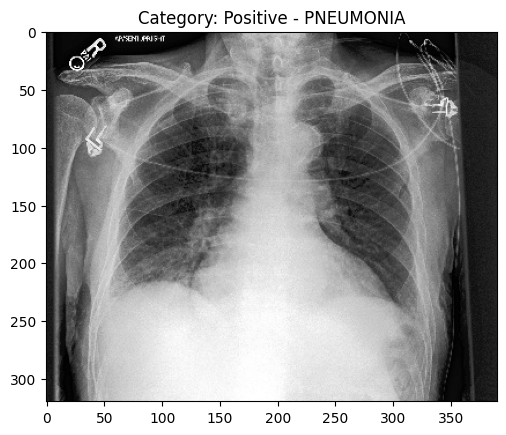

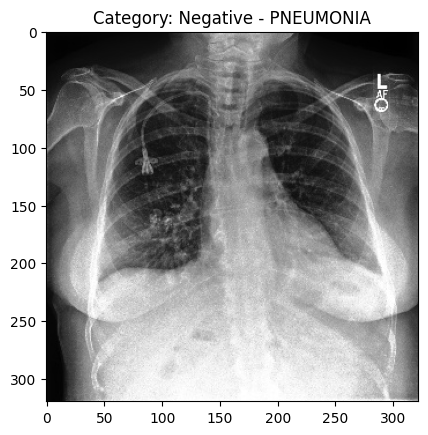

In [10]:
# 데이터 경로 설정
data_dir = './datasets/Pnuemonia/'
categories = ['Positive', 'Negative']

# 샘플 이미지 시각화
for category in categories:
    folder_path = os.path.join(data_dir, category)
    img_name = os.listdir(folder_path)[0]
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(f'Category: {category} - PNEUMONIA')
    plt.show()

### Image Resize

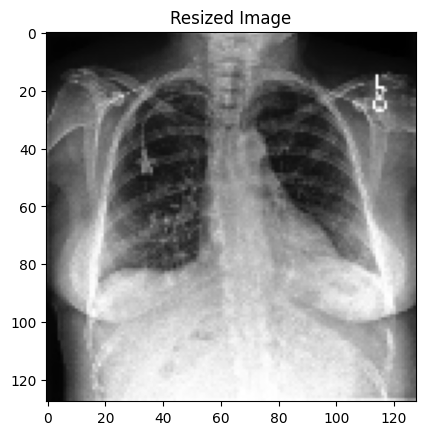

In [4]:
def resize_image(image, size=(128, 128)):
    return cv2.resize(image, size)

# 샘플 이미지 크기 조정
resized_img = resize_image(img)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image')
plt.show()


### Histogram Equalization

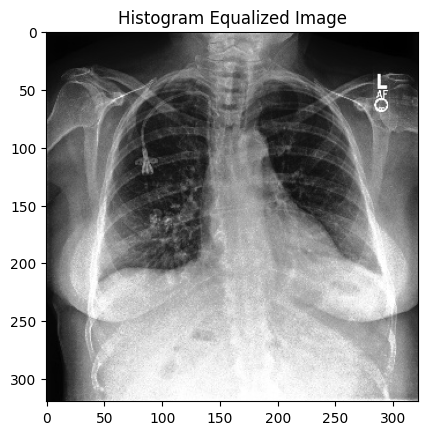

In [5]:
def equalize_histogram(image):
    return cv2.equalizeHist(image)

# 샘플 이미지 히스토그램 평활화
equalized_img = equalize_histogram(img)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized Image')
plt.show()


### Data Augmentation

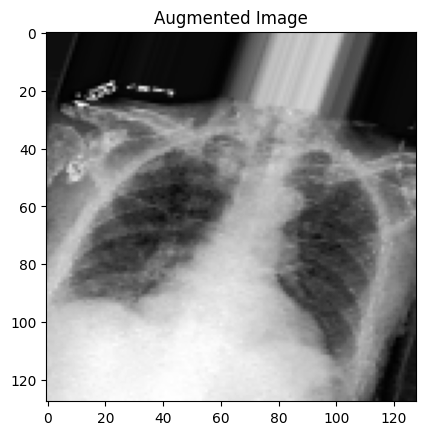

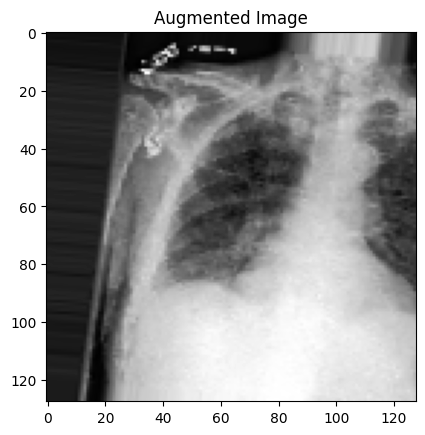

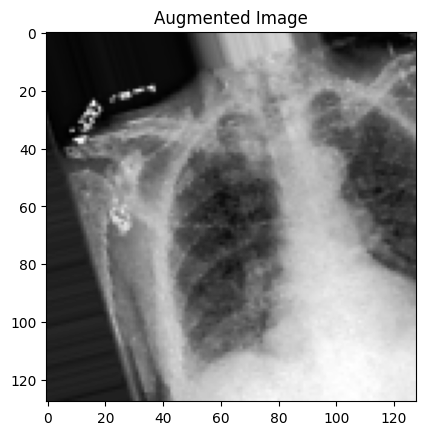

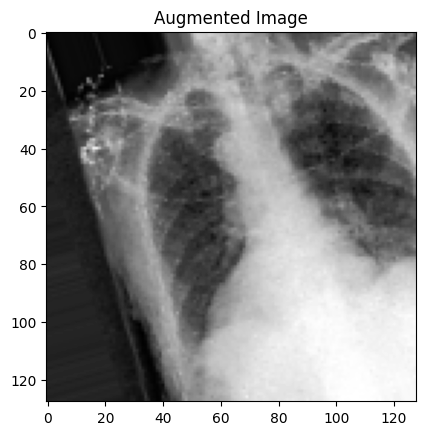

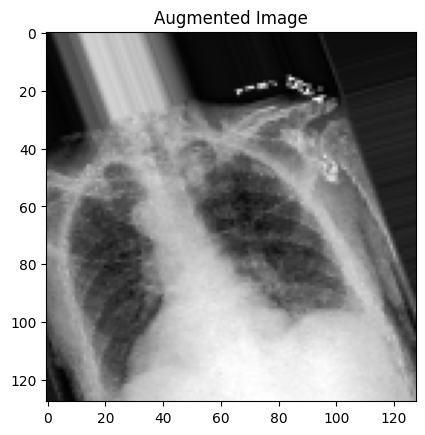

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 이미지를 불러오는 예시
folder_path = './datasets/Pnuemonia/Positive' # 본인 파일 경로 지정
img_name = os.listdir(folder_path)[0] # 폴더 안의 첫번째 파일명
img_path = os.path.join(folder_path, img_name) # 파일 전체 경로
img2 = image.load_img(img_path, color_mode='grayscale', target_size=(128, 128)) # 이미지 불러올 때 resize 처리
img2 = image.img_to_array(img2) # array 변환

# 이미지 차원 확장
img2 = img2.reshape((1, ) + img2.shape)  # (1, 128, 128, 1)

# 데이터 증강 및 시각화
i = 0
for batch in datagen.flow(img2, batch_size=1):
    plt.imshow(batch[0].reshape(128, 128), cmap='gray')
    plt.title('Augmented Image')
    plt.show()
    i += 1
    if i >= 5:
        break

### Noise Reduction

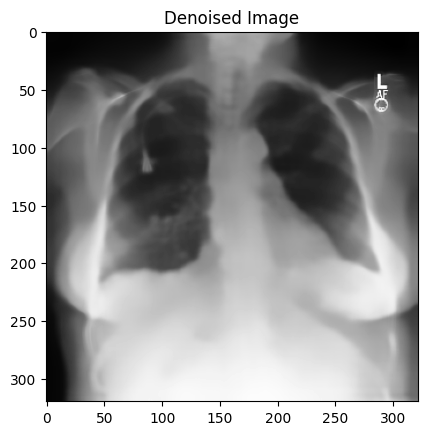

In [11]:
def denoise_image(image):
    return cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

# 샘플 이미지 노이즈 제거
denoised_img = denoise_image(img)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()


### Image Normalization

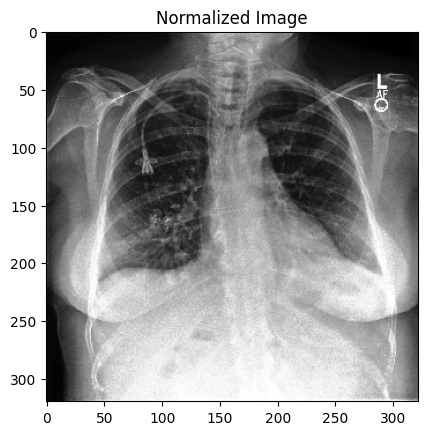

In [12]:
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# 샘플 이미지 정규화
normalized_img = normalize_image(img)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()


### Edge Detection

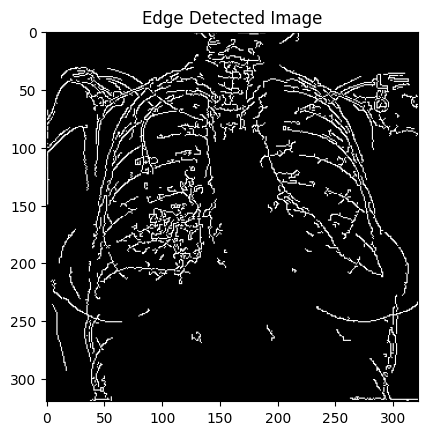

In [13]:
def detect_edges(image):
    return cv2.Canny(image, 100, 200)

# 샘플 이미지 경계선 검출
edges = detect_edges(img)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image')
plt.show()


### Blurring

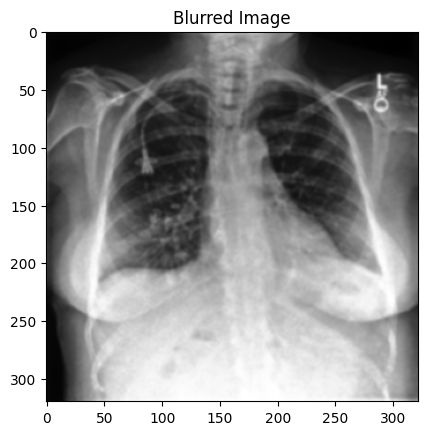

In [14]:
def blur_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# 샘플 이미지 블러링
blurred_img = blur_image(img)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.show()


### Contour Detection

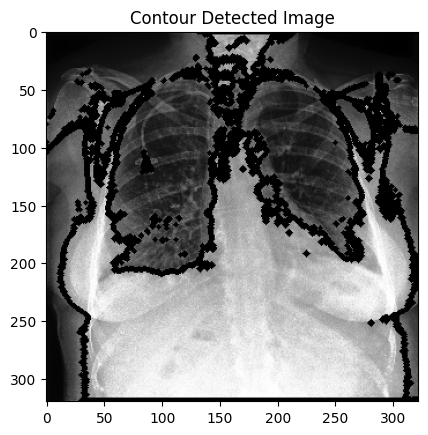

In [15]:
def find_contours(image):
    ret, thresh = cv2.threshold(image, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# 샘플 이미지 컨투어 검출
contours = find_contours(img)
contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Detected Image')
plt.show()


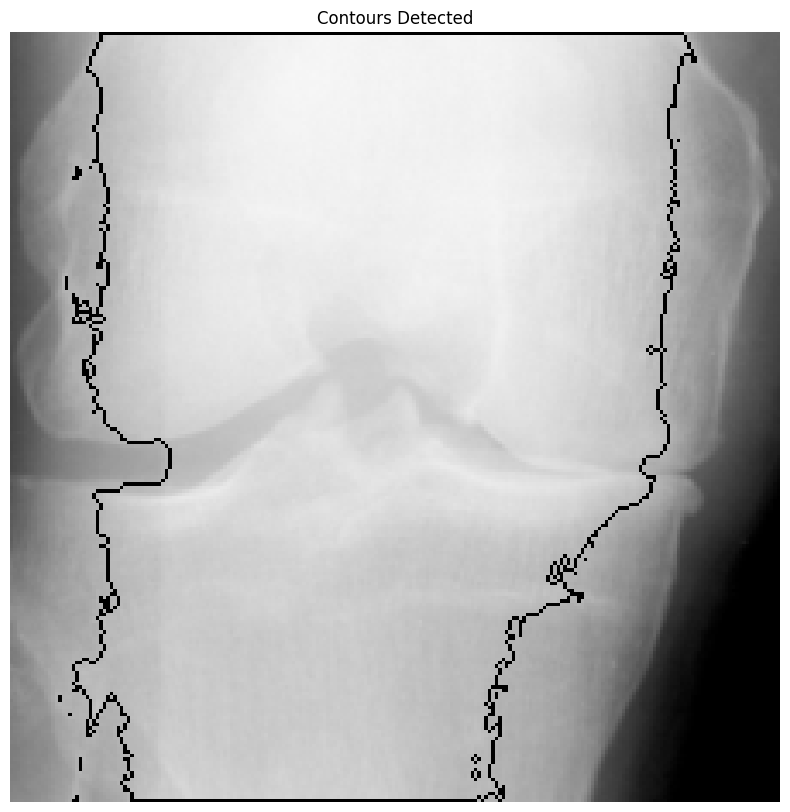

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = './datasets/osteoarthritis/auto_test/4/9012867_1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_color, contours, -1, (0, 0, 0), 1)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title('Contours Detected')
plt.axis('off')
plt.show()

## Data Preparing

X_train shape: (800, 128, 128)
y_train shape: (800,)
X_test shape: (200, 128, 128)
y_test shape: (200,)


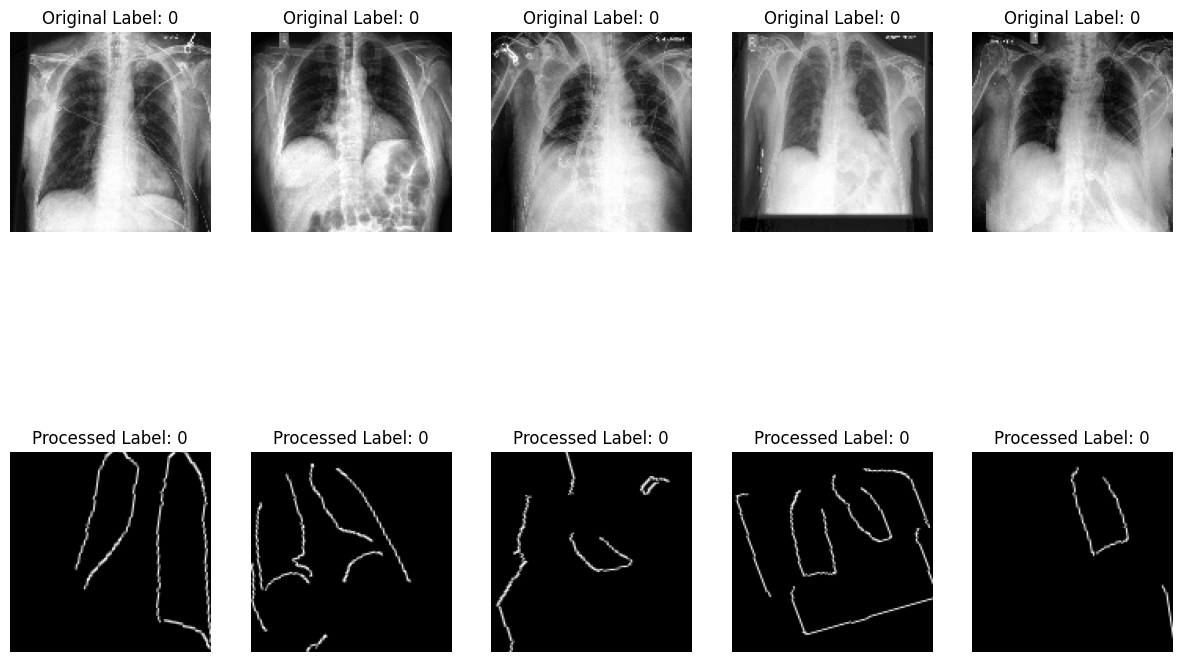

In [21]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# 데이터 경로 설정
data_dir = './datasets/Pnuemonia'
categories = ['Negative', 'Positive']
output_size = (128, 128)
output_train_dir = 'datasets/Pnuemonia/processed_data/train'
output_test_dir = 'datasets/Pnuemonia/processed_data/test'
output_original_train_dir = 'datasets/Pnuemonia/original_data/train'
output_original_test_dir = 'datasets/Pnuemonia/original_data/test'

# 필요한 폴더 생성 함수
def create_directories(base_dir, categories):
    os.makedirs(base_dir, exist_ok=True)
    for category in categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

# 이미지 전처리 함수 정의
def resize_image(image, size=output_size):
    return cv2.resize(image, size)

def equalize_histogram(image):
    return cv2.equalizeHist(image)

def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def denoise_image(image):
    return cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

def blur_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def detect_edges(image):
    return cv2.Canny(image, 100, 200)

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 데이터 로드 및 분할 함수
def load_and_split_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(resize_image(img))
                labels.append(label)
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# 데이터 전처리 및 저장 함수
def preprocess_and_save_data(images, labels, output_dir, original_output_dir, augment=False):
    create_directories(output_dir, categories)
    create_directories(original_output_dir, categories)
    for idx, (image, label) in enumerate(zip(images, labels)):
        category = 'Negative' if label == 0 else 'Positive'
        save_folder_path = os.path.join(output_dir, category)
        original_save_folder_path = os.path.join(original_output_dir, category)

        original_img_path = os.path.join(original_save_folder_path, f'orig_{idx}.png')
        cv2.imwrite(original_img_path, image)  # 원본 이미지 저장

        img = equalize_histogram(image)
        img = normalize_image(img)
        img = denoise_image(img)
        img = blur_image(img)
        img = detect_edges(img)

        if augment:
            img = img.reshape((1, ) + img.shape + (1, ))  # Keras ImageDataGenerator expects 4D input
            for batch in datagen.flow(img, batch_size=1):
                augmented_img = batch[0].reshape(output_size)
                save_path = os.path.join(save_folder_path, f'aug_{idx}.png')
                cv2.imwrite(save_path, augmented_img)
                break  # 하나의 증강된 이미지만 추가
        else:
            save_path = os.path.join(save_folder_path, f'{idx}.png')
            cv2.imwrite(save_path, img)

# 데이터 로드 및 분할
X_train, X_test, y_train, y_test = load_and_split_data(data_dir, categories)

# 전처리 후 데이터 저장
preprocess_and_save_data(X_train, y_train, output_train_dir, output_original_train_dir, augment=True)
preprocess_and_save_data(X_test, y_test, output_test_dir, output_original_test_dir, augment=False)

# 전처리된 데이터 로드 함수
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(resize_image(img))
                labels.append(label)
    return np.array(images), np.array(labels)

# 원본 데이터 로드 함수
def load_original_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(resize_image(img))
                labels.append(label)
    return np.array(images), np.array(labels)

# 전처리된 데이터 로드
X_train, y_train = load_data(output_train_dir, categories)
X_test, y_test = load_data(output_test_dir, categories)

# 원본 데이터 로드
X_original_train, y_original_train = load_original_data(output_original_train_dir, categories)
X_original_test, y_original_test = load_original_data(output_original_test_dir, categories)

# 데이터 형태 확인
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# 데이터 시각화 (원본과 전처리 후 비교)
def plot_sample_images(original_images, processed_images, labels, n=5):
    plt.figure(figsize=(15, 10))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'Original Label: {labels[i]}')
        plt.axis('off')

        plt.subplot(2, n, i+n+1)
        plt.imshow(processed_images[i], cmap='gray')
        plt.title(f'Processed Label: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_sample_images(X_original_train, X_train, y_train)


### 테스트 분류 학습

c:\Users\seoju\.conda\envs\esg-tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,267,137 (12.46 MB)

 Trainable params: 3,267,137 (12.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5788 - loss: 0.6829 - val_accuracy: 0.0000e+00 - val_loss: 1.0709
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6323 - loss: 0.6520 - val_accuracy: 0.0125 - val_loss: 0.9541
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6433 - loss: 0.6237 - val_accuracy: 0.0312 - val_loss: 1.0131
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7369 - loss: 0.5538 - val_accuracy: 0.2438 - val_loss: 1.6064
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8191 - loss: 0.4195 - val_accuracy: 0.2562 - val_loss: 1.6060
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8916 - loss: 0.2624 - val_accuracy: 0.3562 - val_loss: 2.1134
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9293 - loss: 0.1717 - val_accuracy: 0.4062 - val_loss: 1.9697
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9555 - loss: 0.1060 - val_accuracy: 0.3812

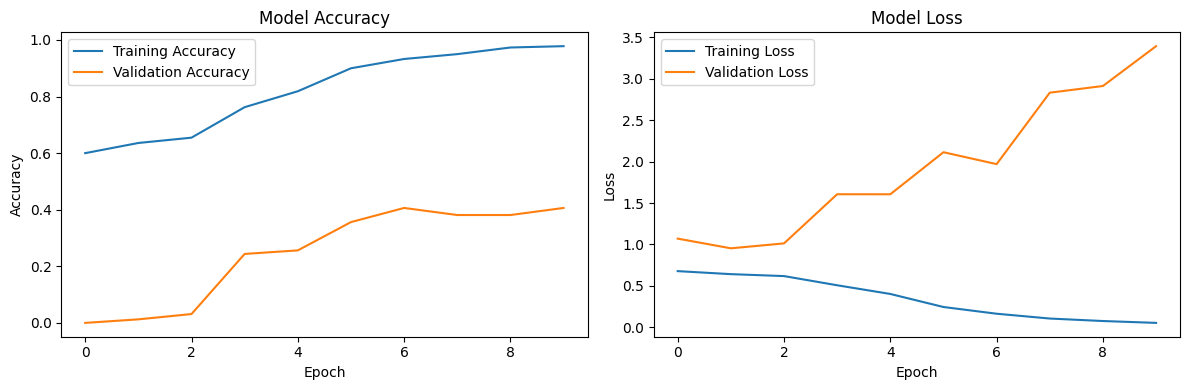

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 데이터 로드 함수 (이전 코드에서 정의한 함수 사용)
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# 데이터 로드
output_train_dir = 'datasets/Pnuemonia/processed_data/train'
output_test_dir = 'datasets/Pnuemonia/processed_data/test'
categories = ['Negative', 'Positive']

X_train, y_train = load_data(output_train_dir, categories)
X_test, y_test = load_data(output_test_dir, categories)

# 데이터 전처리
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1).astype('float32') / 255

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_split=0.2, verbose=1)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

# 예측
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# 분류 보고서 및 혼동 행렬 출력
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Modeling

### VGG16

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Is built with CUDA: ", tf.test.is_built_with_cuda())
print("Is GPU available: ", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

Num GPUs Available:  1
Is built with CUDA:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available:  True


TensorFlow version: 2.10.0
Keras version: 2.10.0
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPUs
X_train shape: (800, 224, 224, 3)
X_test shape: (200, 224, 224, 3)
X_train dtype: float16
y_train dtype: int32
9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                    

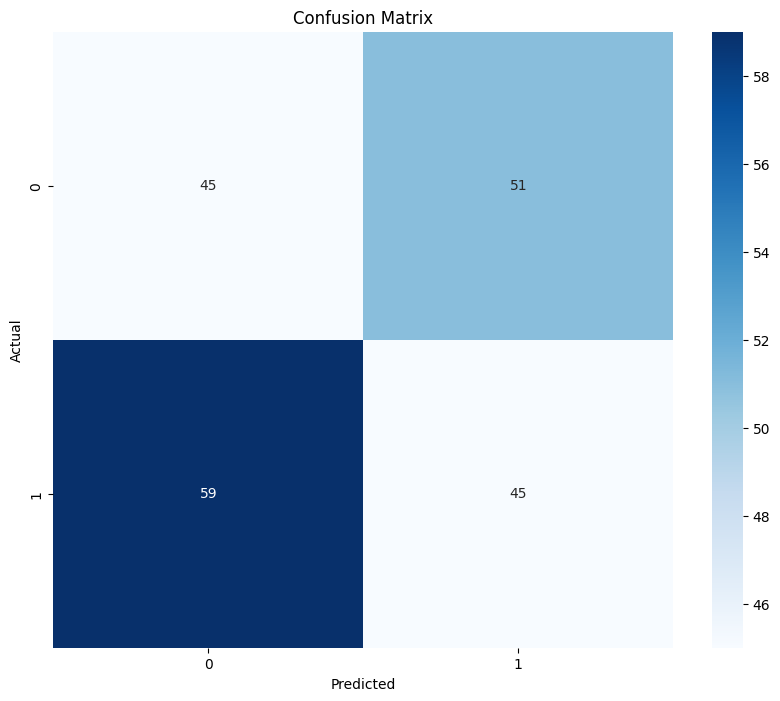

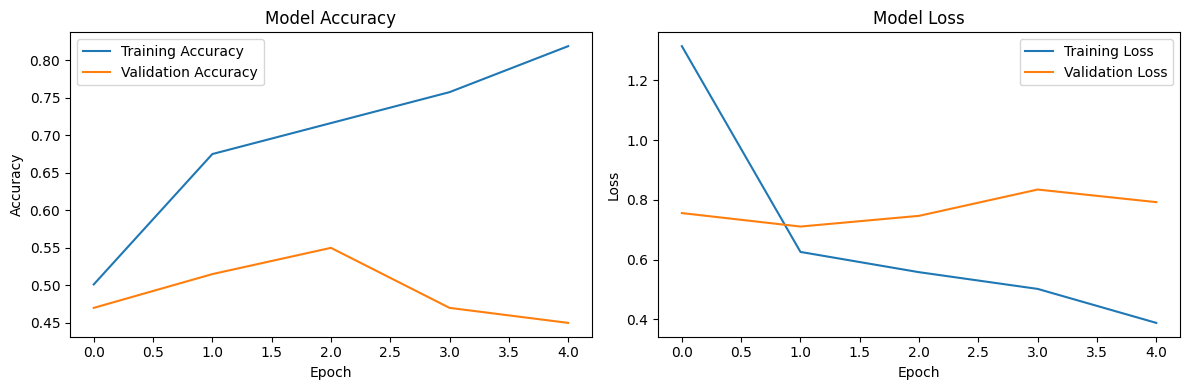

13199

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# TensorFlow 로그 레벨 설정
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

# GPU 설정
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]
        )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

# 데이터 로드 함수
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# 데이터 로드
output_train_dir = 'datasets/Pnuemonia/processed_data/train'
output_test_dir = 'datasets/Pnuemonia/processed_data/test'
categories = ['Negative', 'Positive']

X_train, y_train = load_data(output_train_dir, categories)
X_test, y_test = load_data(output_test_dir, categories)

# 데이터 전처리
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = tf.image.resize(X_train, (224, 224))
X_test = tf.image.resize(X_test, (224, 224))

X_train = tf.image.grayscale_to_rgb(X_train)
X_test = tf.image.grayscale_to_rgb(X_test)

X_train = X_train.numpy().astype('float16') / 255
X_test = X_test.numpy().astype('float16') / 255

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

# 데이터셋 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(16)

# 메모리 해제
del X_train, X_test
gc.collect()

# 모델 정의
with tf.device('/GPU:0'):
    inputs = Input(shape=(224, 224, 3))
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=inputs)
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # 모델 학습
    history = model.fit(train_dataset, epochs=5, 
                        validation_data=test_dataset, verbose=1)

# 모델 평가
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

# 예측
y_pred = model.predict(test_dataset)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = tf.concat([y for x, y in test_dataset], axis=0)

# 분류 보고서 출력
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix 시각화
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 메모리 해제
del history
gc.collect()

Virtual devices cannot be modified after being initialized
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Train data shape: (800, 224, 224, 3), Train labels shape: (800,)
Test data shape: (200, 224, 224, 3), Test labels shape: (200,)
Training ResNet50V2 model...
Epoch 1/50
25/25 [==============================] - 12s 327ms/step - loss: 0.7077 - accuracy: 0.5013 - val_loss: 0.7182 - val_accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 7s 259ms/step - loss: 0.7042 - accuracy: 0.4762 - val_loss: 0.6992 - val_accuracy: 0.4850 - lr: 1.0000e-04
Epoch 3/50
25/25 [==============================] - 7s 256ms/step - loss: 0.6975 - accuracy: 0.4863 - val_loss: 0.6976 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 4/50
25/25 [==============================] - 7s 256ms/step - loss: 0.7027 - accuracy: 0.4875 - val_loss: 0.6934 - val_accuracy: 0.5300 - lr: 1.0000e-04
Epoch 5/50
25/25 [==============================] - 7s 259ms/ste

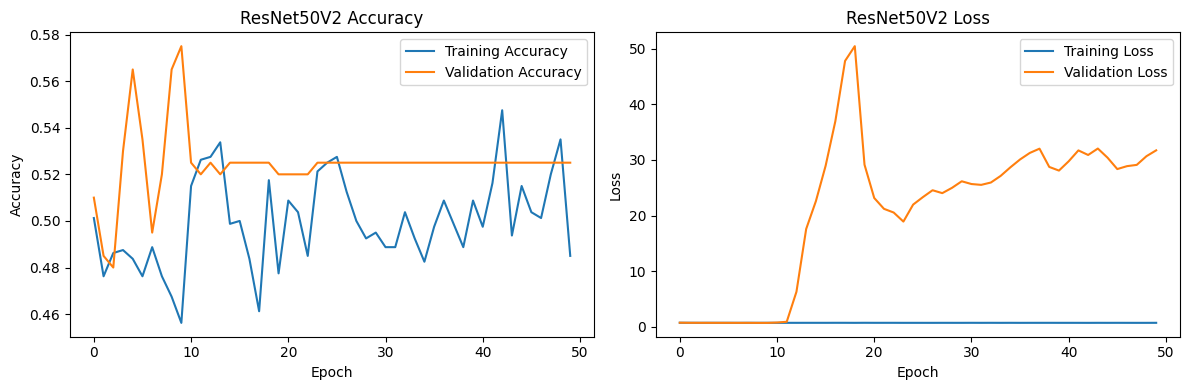

ResNet50V2 Test accuracy: 0.5250
7/7 [==============================] - 1s 62ms/step
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        96
           1       0.52      1.00      0.69       104

    accuracy                           0.53       200
   macro avg       0.76      0.51      0.35       200
weighted avg       0.75      0.53      0.37       200



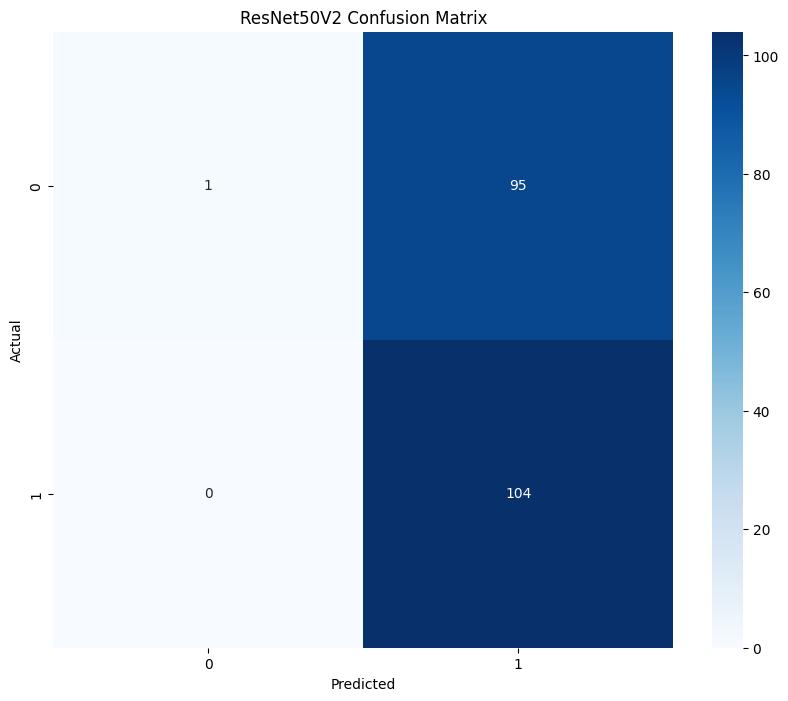

Training EfficientNetB0 model...
Epoch 1/50
25/25 [==============================] - 10s 267ms/step - loss: 0.7093 - accuracy: 0.5250 - val_loss: 0.6973 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 7s 255ms/step - loss: 0.7095 - accuracy: 0.5225 - val_loss: 0.7008 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 3/50
25/25 [==============================] - 7s 247ms/step - loss: 0.7045 - accuracy: 0.4975 - val_loss: 0.7008 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 4/50
25/25 [==============================] - 7s 249ms/step - loss: 0.7087 - accuracy: 0.4837 - val_loss: 0.7018 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 5/50
25/25 [==============================] - 7s 245ms/step - loss: 0.7088 - accuracy: 0.5175 - val_loss: 0.6996 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 6/50
25/25 [==============================] - 7s 250ms/step - loss: 0.7001 - accuracy: 0.5163 - val_loss: 0.6994 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 7/50
2

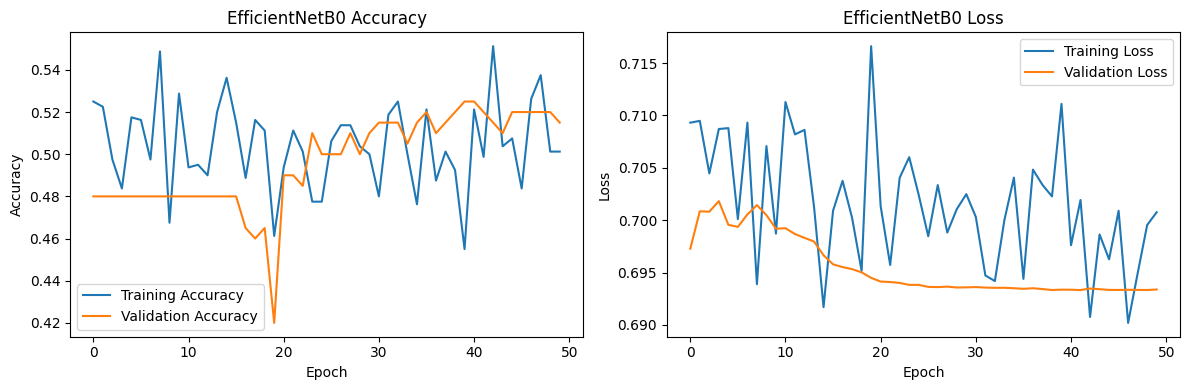

EfficientNetB0 Test accuracy: 0.5150
7/7 [==============================] - 1s 46ms/step
              precision    recall  f1-score   support

           0       0.40      0.02      0.04        96
           1       0.52      0.97      0.68       104

    accuracy                           0.52       200
   macro avg       0.46      0.50      0.36       200
weighted avg       0.46      0.52      0.37       200



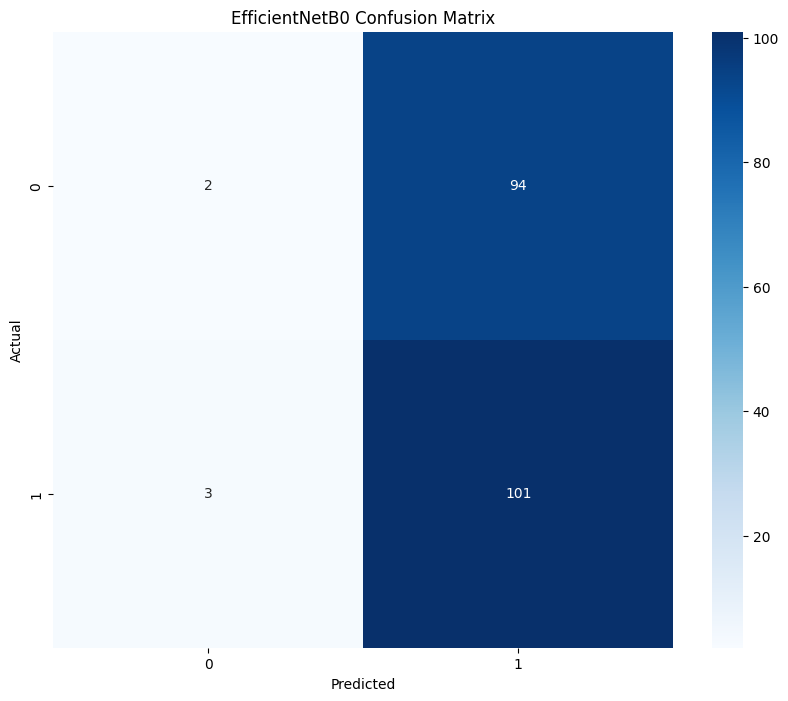

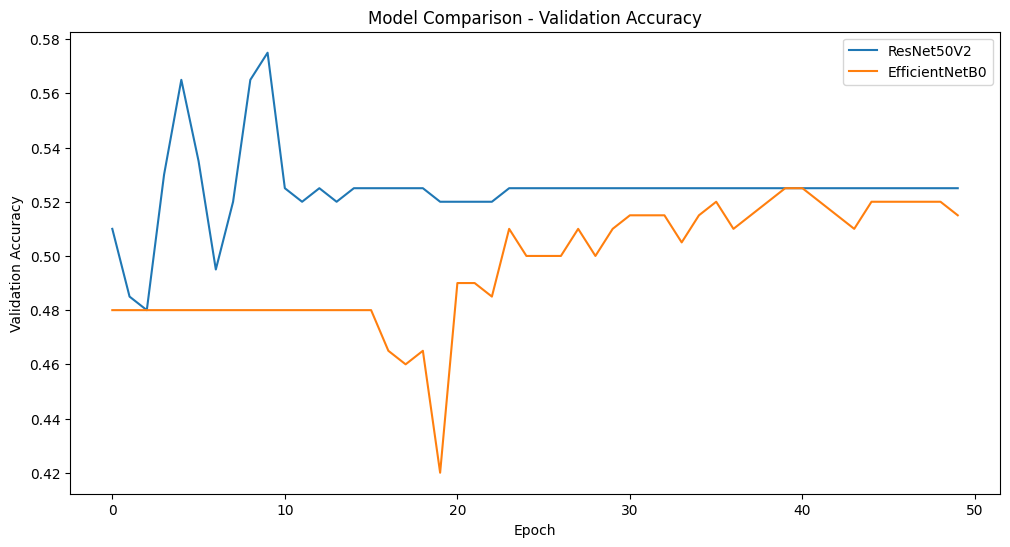

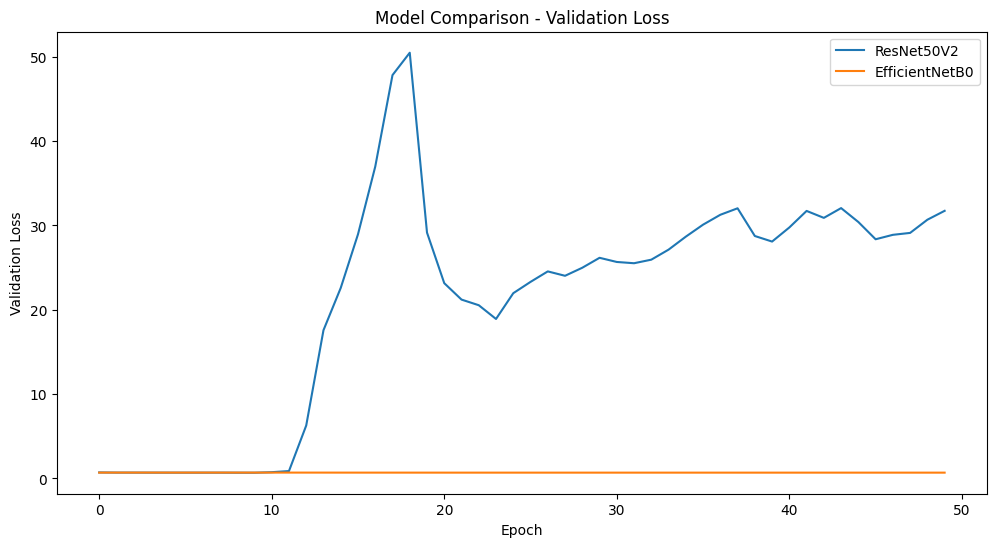

In [4]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# GPU 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7680)]  # 7.5GB
        )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# 메모리 정리 콜백
class MemoryCleanupCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()

# 데이터 로드 및 전처리 함수
def load_and_preprocess_data(train_dir, test_dir, img_size=(224, 224)):
    def load_data(data_dir):
        images = []
        labels = []
        categories = ['Negative', 'Positive']
        for category in categories:
            path = os.path.join(data_dir, category)
            class_num = categories.index(category)
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, img_size)
                    images.append(new_array)
                    labels.append(class_num)
                except Exception as e:
                    print(f"Error loading image {img}: {e}")
        return np.array(images), np.array(labels)

    X_train, y_train = load_data(train_dir)
    X_test, y_test = load_data(test_dir)

    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    X_train = np.repeat(X_train, 3, axis=-1)
    X_test = np.repeat(X_test, 3, axis=-1)

    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")
    print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

    return X_train, y_train, X_test, y_test

# 데이터 로드
train_dir = 'datasets/Pnuemonia/processed_data/train'
test_dir = 'datasets/Pnuemonia/processed_data/test'
X_train, y_train, X_test, y_test = load_and_preprocess_data(train_dir, test_dir)

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2]
)

# 결과 시각화 함수
def plot_results(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 평가 함수
def evaluate_model(model, X_test, y_test, model_name):
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'{model_name} Test accuracy: {test_acc:.4f}')

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    print(classification_report(y_test, y_pred_classes))

    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 학습률 스케줄러
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# 모델 생성 및 훈련 함수
def create_and_train_model(model_type, X_train, y_train, X_test, y_test):
    with tf.device('/GPU:0'):
        inputs = Input(shape=(224, 224, 3))
        if model_type == 'ResNet50V2':
            base_model = ResNet50V2(weights='imagenet', include_top=False, input_tensor=inputs)
            for layer in base_model.layers[:-50]:
                layer.trainable = False
        elif model_type == 'EfficientNetB0':
            base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=inputs)
            for layer in base_model.layers[:-30]:
                layer.trainable = False

        x = GlobalAveragePooling2D()(base_model.output)
        x = Dense(1024, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=32),
            steps_per_epoch=len(X_train) // 32,
            epochs=50,
            validation_data=(X_test, y_test),
            verbose=1,
            callbacks=[MemoryCleanupCallback(), reduce_lr]
        )

        return model, history

# 모델 훈련 및 평가
model_histories = []

# ResNet50V2 모델 훈련
print("Training ResNet50V2 model...")
resnet_model, history_resnet = create_and_train_model('ResNet50V2', X_train, y_train, X_test, y_test)
model_histories.append(('ResNet50V2', history_resnet))
plot_results(history_resnet, 'ResNet50V2')
evaluate_model(resnet_model, X_test, y_test, 'ResNet50V2')

# 메모리 정리
del resnet_model, history_resnet
gc.collect()
tf.keras.backend.clear_session()

# EfficientNetB0 모델 훈련
print("Training EfficientNetB0 model...")
efficientnet_model, history_efficientnet = create_and_train_model('EfficientNetB0', X_train, y_train, X_test, y_test)
model_histories.append(('EfficientNetB0', history_efficientnet))
plot_results(history_efficientnet, 'EfficientNetB0')
evaluate_model(efficientnet_model, X_test, y_test, 'EfficientNetB0')

# 메모리 정리
del efficientnet_model, history_efficientnet
gc.collect()
tf.keras.backend.clear_session()

# 모델 성능 비교 시각화
plt.figure(figsize=(12, 6))
for name, history in model_histories:
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Model Comparison - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for name, history in model_histories:
    plt.plot(history.history['val_loss'], label=name)
plt.title('Model Comparison - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

## 수정 전처리

X_train shape: (3200, 224, 224)
y_train shape: (3200,)
X_test shape: (200, 224, 224)
y_test shape: (200,)


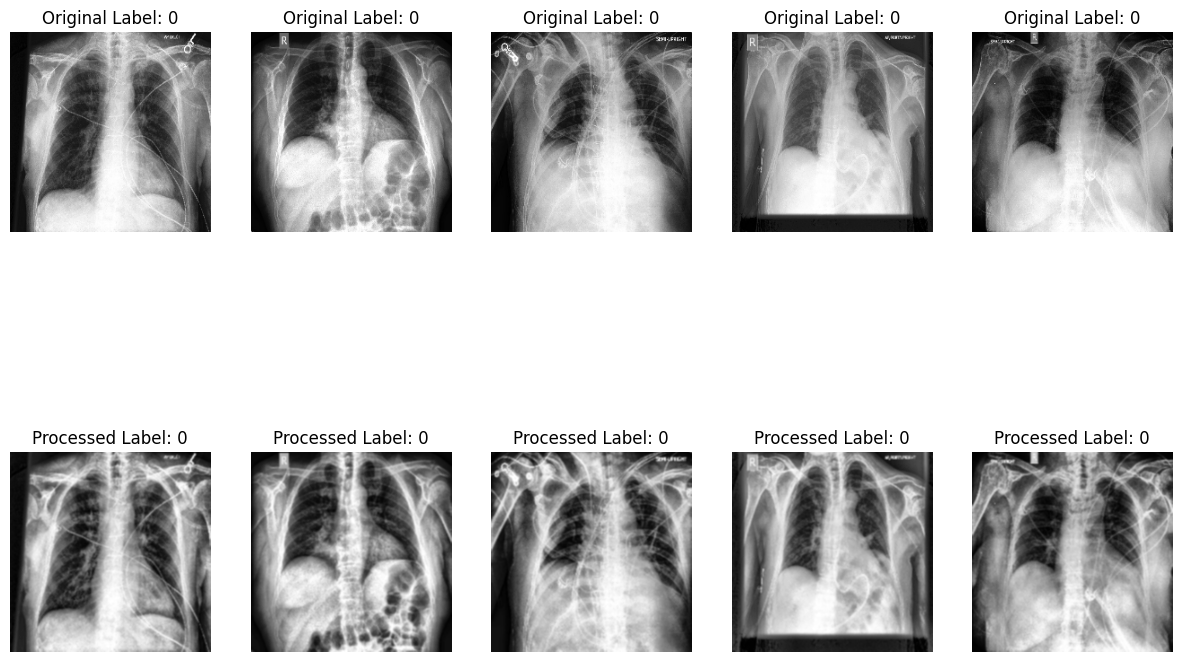

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
data_dir = './datasets/Pnuemonia'
categories = ['Negative', 'Positive']
output_size = (224, 224)  # 일반적인 CNN 입력 크기로 변경
output_train_dir = 'datasets/Pnuemonia/processed_data2/train'
output_test_dir = 'datasets/Pnuemonia/processed_data2/test'
output_original_train_dir = 'datasets/Pnuemonia/original_data2/train'
output_original_test_dir = 'datasets/Pnuemonia/original_data2/test'

# 필요한 폴더 생성 함수
def create_directories(base_dir, categories):
    os.makedirs(base_dir, exist_ok=True)
    for category in categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

# 이미지 전처리 함수 정의
def preprocess_xray(image, target_size=output_size):
    # 이미지 크기 조정
    image = cv2.resize(image, target_size)
    
    # CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image = clahe.apply(image)
    
    # 가우시안 블러로 노이즈 감소 (약한 정도로 적용)
    image = cv2.GaussianBlur(image, (3, 3), 0)
    
    # 정규화 (0-1 범위로)
    image = image.astype(np.float32) / 255.0
    
    return image

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    fill_mode='constant',
    cval=0
)

# 데이터 로드 및 분할 함수
def load_and_split_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# 데이터 전처리 및 저장 함수
def preprocess_and_save_data(images, labels, output_dir, original_output_dir, augment=False):
    create_directories(output_dir, categories)
    create_directories(original_output_dir, categories)
    for idx, (image, label) in enumerate(zip(images, labels)):
        category = 'Negative' if label == 0 else 'Positive'
        save_folder_path = os.path.join(output_dir, category)
        original_save_folder_path = os.path.join(original_output_dir, category)

        # 원본 이미지 저장
        original_img_path = os.path.join(original_save_folder_path, f'orig_{idx}.png')
        cv2.imwrite(original_img_path, image)

        # 전처리 적용
        processed_img = preprocess_xray(image)

        # 전처리된 이미지 저장
        save_path = os.path.join(save_folder_path, f'{idx}.png')
        cv2.imwrite(save_path, (processed_img * 255).astype(np.uint8))

        if augment:
            img_for_aug = processed_img.reshape((1,) + processed_img.shape + (1,))
            i = 0
            for batch in datagen.flow(img_for_aug, batch_size=1):
                augmented_img = batch[0].reshape(output_size)
                aug_save_path = os.path.join(save_folder_path, f'aug_{idx}_{i}.png')
                cv2.imwrite(aug_save_path, (augmented_img * 255).astype(np.uint8))
                i += 1
                if i >= 3:  # 각 이미지당 3개의 증강된 이미지 생성
                    break

# 데이터 로드 및 분할
X_train, X_test, y_train, y_test = load_and_split_data(data_dir, categories)

# 전처리 후 데이터 저장
preprocess_and_save_data(X_train, y_train, output_train_dir, output_original_train_dir, augment=True)
preprocess_and_save_data(X_test, y_test, output_test_dir, output_original_test_dir, augment=False)

# 전처리된 데이터 로드 함수
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, output_size)
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Warning: Unable to read image {img_path}")
            except Exception as e:
                print(f"Error processing image {img_path}: {str(e)}")
    return np.array(images), np.array(labels)

# 전처리된 데이터 로드
X_train, y_train = load_data(output_train_dir, categories)
X_test, y_test = load_data(output_test_dir, categories)

def load_original_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        label = 0 if category == 'Negative' else 1
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, output_size)  # 모든 이미지를 동일한 크기로 조정
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# 원본 데이터 로드
X_original_train, y_original_train = load_original_data(output_original_train_dir, categories)
X_original_test, y_original_test = load_original_data(output_original_test_dir, categories)

# 데이터 형태 확인
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# 데이터 시각화 (원본과 전처리 후 비교)
def plot_sample_images(original_images, processed_images, labels, n=5):
    plt.figure(figsize=(15, 10))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'Original Label: {labels[i]}')
        plt.axis('off')

        plt.subplot(2, n, i+n+1)
        plt.imshow(processed_images[i], cmap='gray')
        plt.title(f'Processed Label: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_sample_images(X_original_train, X_train, y_train)

## modeling, training, evaluation

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import gc

### GPU 설정

In [ ]:
# GPU 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7680)]  # 7.5GB
        )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# 메모리 정리 콜백
class MemoryCleanupCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()

### 데이터 불러오기 및 전처리

In [3]:
# 데이터 로드 및 전처리 함수
def load_and_preprocess_data(train_dir, test_dir, img_size=(224, 224)):
    def load_data(data_dir):
        images = []
        labels = []
        categories = ['Negative', 'Positive']
        for category in categories:
            path = os.path.join(data_dir, category)
            class_num = categories.index(category)
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, img_size) # 모델용 resize
                    images.append(new_array)
                    labels.append(class_num)
                except Exception as e:
                    print(f"Error loading image {img}: {e}")
        return np.array(images), np.array(labels)

    X_train, y_train = load_data(train_dir)
    X_test, y_test = load_data(test_dir)

    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    X_train = np.repeat(X_train, 3, axis=-1)
    X_test = np.repeat(X_test, 3, axis=-1)

    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")
    print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

    return X_train, y_train, X_test, y_test

# 데이터 로드
train_dir = 'datasets/Pneumonia/processed_data2/train'
test_dir = 'datasets/Pneumonia/processed_data2/test'
X_train, y_train, X_test, y_test = load_and_preprocess_data(train_dir, test_dir)

Train data shape: (3200, 224, 224, 3), Train labels shape: (3200,)
Test data shape: (200, 224, 224, 3), Test labels shape: (200,)


### Data augmentation

In [ ]:
# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2]
)

### Functions

In [ ]:
# 결과 시각화 함수
def plot_results(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 평가 함수
def evaluate_model(model, X_test, y_test, model_name):
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'{model_name} Test accuracy: {test_acc:.4f}')

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    print(classification_report(y_test, y_pred_classes))

    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 학습률 스케줄러
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# 모델 생성 및 훈련 함수
def create_and_train_model(model_type, X_train, y_train, X_test, y_test):
    with tf.device('/GPU:0'):
        inputs = Input(shape=(224, 224, 3))
        if model_type == 'ResNet50V2':
            base_model = ResNet50V2(weights='imagenet', include_top=False, input_tensor=inputs)
            for layer in base_model.layers[:-50]:
                layer.trainable = False
        elif model_type == 'EfficientNetB0':
            base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=inputs)
            for layer in base_model.layers[:-30]:
                layer.trainable = False

        x = GlobalAveragePooling2D()(base_model.output)
        x = Dense(1024, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)

        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=32),
            steps_per_epoch=len(X_train) // 32,
            epochs=50,
            validation_data=(X_test, y_test),
            verbose=1,
            callbacks=[MemoryCleanupCallback(), reduce_lr]
        )

        return model, history

### Training, Evaluation

#### ResNet50V2

In [ ]:
# 모델 훈련 및 평가
model_histories = []

# ResNet50V2 모델 훈련
print("Training ResNet50V2 model...")
resnet_model, history_resnet = create_and_train_model('ResNet50V2', X_train, y_train, X_test, y_test)
model_histories.append(('ResNet50V2', history_resnet))
plot_results(history_resnet, 'ResNet50V2')
evaluate_model(resnet_model, X_test, y_test, 'ResNet50V2')

# 메모리 정리
del resnet_model, history_resnet
gc.collect()
tf.keras.backend.clear_session()

#### EfficientNetB0

In [ ]:
# EfficientNetB0 모델 훈련
print("Training EfficientNetB0 model...")
efficientnet_model, history_efficientnet = create_and_train_model('EfficientNetB0', X_train, y_train, X_test, y_test)
model_histories.append(('EfficientNetB0', history_efficientnet))
plot_results(history_efficientnet, 'EfficientNetB0')
evaluate_model(efficientnet_model, X_test, y_test, 'EfficientNetB0')

# 메모리 정리
del efficientnet_model, history_efficientnet
gc.collect()
tf.keras.backend.clear_session()

# 모델 성능 비교 시각화
plt.figure(figsize=(12, 6))
for name, history in model_histories:
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Model Comparison - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for name, history in model_histories:
    plt.plot(history.history['val_loss'], label=name)
plt.title('Model Comparison - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

## model optimizing

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### Data 전처리 추가사항

In [6]:
def resize_and_rescale(image, label):
    image = tf.image.resize(image, (299, 299))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

### Data Generator modify
    - Augmentation으로 생성(제한적 증강)

In [7]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
])

### Data Preparing

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = (
    train_ds
    .map(resize_and_rescale, num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .shuffle(1000)
    .batch(32)
    .map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

# 테스트 데이터셋 준비
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

### InceptionV3 modeling

In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# InceptionV3 모델 로드 및 설정
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=outputs)

# 상위 레이어만 훈련 가능하도록 설정
for layer in base_model.layers[:-50]:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

87910968/87910968 [==============================] - 9s 0us/step


### Callback

In [10]:
# 콜백 설정
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)
]

### Training & Evaluation

In [13]:
# 모델 훈련
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    callbacks=callbacks
)

# 모델 평가
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/50
100/100 [==============================] - 20s 139ms/step - loss: 0.4837 - accuracy: 0.7934 - val_loss: 0.7863 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 2/50
100/100 [==============================] - 14s 122ms/step - loss: 0.6020 - accuracy: 0.7063 - val_loss: 0.9126 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 3/50
100/100 [==============================] - 13s 123ms/step - loss: 0.6159 - accuracy: 0.6922 - val_loss: 0.8338 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 4/50
100/100 [==============================] - 13s 125ms/step - loss: 0.6530 - accuracy: 0.6762 - val_loss: 0.7561 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 5/50
100/100 [==============================] - 14s 126ms/step - loss: 0.6300 - accuracy: 0.6662 - val_loss: 0.8300 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 6/50
100/100 [==============================] - 14s 126ms/step - loss: 0.6810 - accuracy: 0.6194 - val_loss: 0.8627 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 7/50
100/100 [========

### Prediction

7/7 [==============================] - 1s 119ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.52      1.00      0.68       104

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.36       200



c:\Users\seoju\.conda\envs\esg-tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\seoju\.conda\envs\esg-tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\seoju\.conda\envs\esg-tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


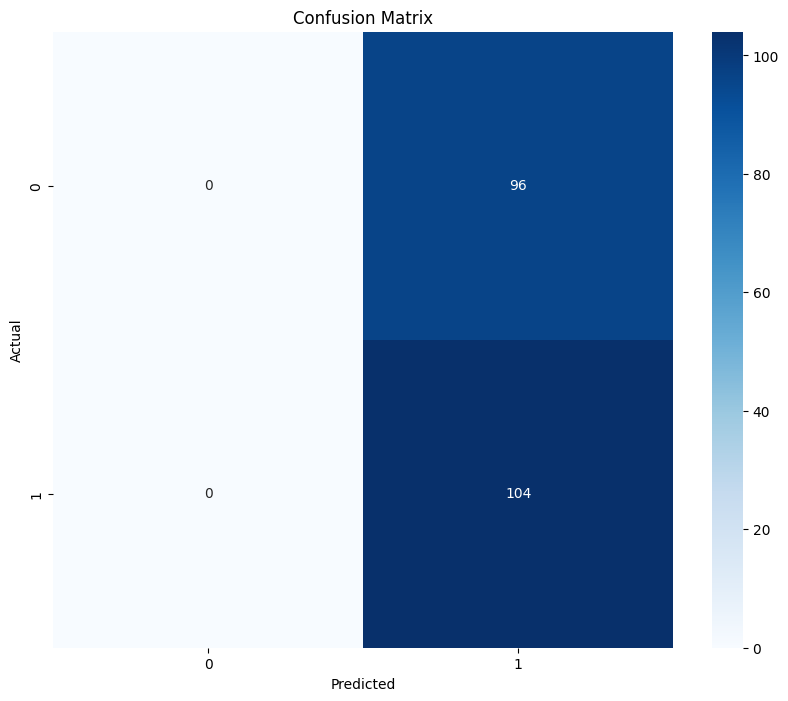

In [14]:
# 예측 및 성능 평가
y_pred = model.predict(test_ds)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = tf.concat([y for x, y in test_ds], axis=0)

# 분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred_classes))

# 혼동 행렬
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()